<a href="https://colab.research.google.com/github/MarwaRayen/Smart-Irrigation-System/blob/main/PredictionModelFASI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des librairies et compréhension du dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('cleaned_plants_data.csv')
print(data.info())
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   water req  1910 non-null   float64
 1   month      1910 non-null   object 
 2   Min Temp   1910 non-null   float64
 3   Max Temp   1910 non-null   float64
 4   Humidity   1910 non-null   float64
 5   Wind       1910 non-null   float64
 6   Sun        1910 non-null   float64
 7   Rad        1910 non-null   float64
 8   Rain       1910 non-null   float64
 9   altitude   1910 non-null   float64
 10  latitude   1910 non-null   float64
 11  longitude  1910 non-null   object 
 12  crop       1910 non-null   object 
 13  soil       1910 non-null   object 
 14  city       1245 non-null   object 
dtypes: float64(10), object(5)
memory usage: 224.0+ KB
None
          water req month     Min Temp     Max Temp     Humidity         Wind  \
count   1910.000000  1910  1910.000000  1910.000000  1910.000000  1910.0

In [ ]:
data

,water req,month,Min Temp,Max Temp,Humidity,Wind,Sun,Rad,Rain,altitude,latitude,longitude,crop,soil,city
0,83.990001,March,16.08,32.01,35.03,192.02,8.10,19.2400,5.04,431.07,26.9100,75.78,potato,red loamy,jaipur
1,39.070000,March,21.02,32.03,62.01,168.09,9.02,22.0800,10.00,14.05,19.1700,wheat,red sandy,mumbai,NaN
2,235.180000,May,27.07,39.02,63.07,312.01,9.10,23.2700,32.08,7.00,13.0900,80.27,potato,red loamy,chennai
3,108.980000,April,21.05,36.03,41.07,168.05,10.09,23.8400,40.07,216.07,28.7598,wheat,red sandy,delhi,NaN
4,0.020000,July,26.01,36.02,64.07,288.04,6.07,18.4300,111.01,7.08,13.0900,wheat,red sandy,chennai,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,17.959700,august,24.10,33.01,81.09,240.02,5.10,17.0000,227.07,431.03,26.9600,75.78,rice,BLACK CLAY,jaipur
1906,0.040000,august,26.09,33.09,84.01,144.10,4.10,15.7199,339.08,9.03,22.7798,88.36,rice,BLACK CLAY,kolkata
1907,96.660000,May,26.06,36.05,73.07,192.04,8.43,22.6900,126.02,9.06,22.7700,wheat,red sandy,kolkata,NaN
1908,5.149950,june,27.10,34.07,80.04,168.08,4.56,16.8000,301.09,9.06,22.7900,88.36,rice,BLACK CLAY,kolkata


Remarques : un prétraitement est nécéssaire pour ce dataset puisque on peut voir qu'il y a plein de valeurs nulles et que dans certaines colonnes il y a des fautes ( comme dans longtitude ou on trouve weat a la place d'une valeur numérique )

# Pré-traitement du dataset




Nous jugeons que les colonnes altitude, longtitude et latitude sont des colonnes qui sont pas nécessairement pertinentes dans notre cas donc on va les supprimer de notre dataset, et puis nous avons la colonne city

In [ ]:
data = data.drop(columns=['altitude', 'latitude', 'longitude'])
data.head()


,water req,month,Min Temp,Max Temp,Humidity,Wind,Sun,Rad,Rain,crop,soil,city
0,83.990001,March,16.08,32.01,35.03,192.02,8.10,19.24,5.04,potato,red loamy,jaipur
1,39.070000,March,21.02,32.03,62.01,168.09,9.02,22.08,10.00,red sandy,mumbai,NaN
2,235.180000,May,27.07,39.02,63.07,312.01,9.10,23.27,32.08,potato,red loamy,chennai
3,108.980000,April,21.05,36.03,41.07,168.05,10.09,23.84,40.07,red sandy,delhi,NaN
4,0.020000,July,26.01,36.02,64.07,288.04,6.07,18.43,111.01,red sandy,chennai,NaN


Remplaçons maintenant les valuers nulles

In [ ]:
# Fill numerical NaNs with the mean value of the column
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill categorical NaNs with the mode value of the column
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more NaNs
print(data.isna().sum())
data.head()

water req    0
month        0
Min Temp     0
Max Temp     0
Humidity     0
Wind         0
Sun          0
Rad          0
Rain         0
crop         0
soil         0
city         0
dtype: int64


,water req,month,Min Temp,Max Temp,Humidity,Wind,Sun,Rad,Rain,crop,soil,city
0,83.990001,March,16.08,32.01,35.03,192.02,8.10,19.24,5.04,potato,red loamy,jaipur
1,39.070000,March,21.02,32.03,62.01,168.09,9.02,22.08,10.00,red sandy,mumbai,kurnool
2,235.180000,May,27.07,39.02,63.07,312.01,9.10,23.27,32.08,potato,red loamy,chennai
3,108.980000,April,21.05,36.03,41.07,168.05,10.09,23.84,40.07,red sandy,delhi,kurnool
4,0.020000,July,26.01,36.02,64.07,288.04,6.07,18.43,111.01,red sandy,chennai,kurnool


On peut voir maintenant qu'il n y a plus de valeurs nulles dans le dataset, c'est au tour de la feature selection, une étape très importante dans le prétraitement pour optimiser les performances et le rendu de notre modèle de prédiction. ça permet aussi d'éviter l'overfitting

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['month','crop', 'soil', 'city']

# Encode categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

print(data.head())
# Define the target variable and features
X = data.drop('water req', axis=1)
y = data['water req']


    water req  month  Min Temp  Max Temp  Humidity    Wind    Sun    Rad  \
0   83.990001      3     16.08     32.01     35.03  192.02   8.10  19.24   
1   39.070000      3     21.02     32.03     62.01  168.09   9.02  22.08   
2  235.180000      4     27.07     39.02     63.07  312.01   9.10  23.27   
3  108.980000      0     21.05     36.03     41.07  168.05  10.09  23.84   
4    0.020000      1     26.01     36.02     64.07  288.04   6.07  18.43   

     Rain  crop  soil  city  
0    5.04     0     7     2  
1   10.00     1     6     4  
2   32.08     0     7     0  
3   40.07     1     2     4  
4  111.01     1     1     4  


Après avoir encodé nos données, nous procédons à vérifier la corrélation entre nos variables avec une matrice de corrélation afin de découvrir les relations entres elles et voir celles qui ont la plus grande corrélation avec notre variable de sortie

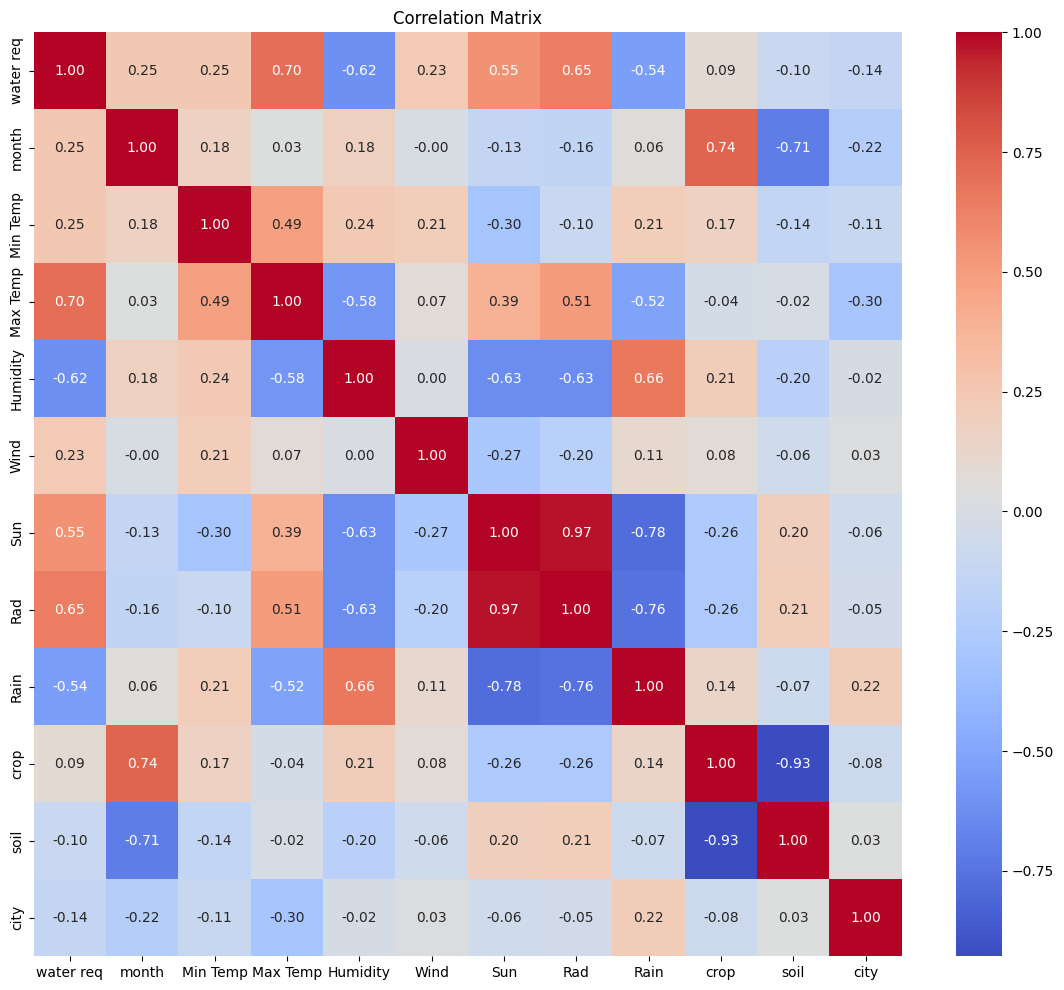

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

On voir bien alors que les variables les plus corrélées avec les besoins en eau sont les variables de températures, humidité, soleil, radiation, pluie et légèrement le vent.

Passons donc à la selections des variables les plus pertinentes grâce à la méthode RFE ( Recursive feature elimination )

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Utiliser RFE pour sélectionner les caractéristiques
model = LinearRegression()
rfe = RFE(model, n_features_to_select=8) #sur 11 variables on aimerait selectionner les 8 les plus pertinentes
fit = rfe.fit(X, y)

# Imprimer les caractéristiques sélectionnées
selected_features = X.columns[fit.support_]
print("Caractéristiques sélectionnées:", selected_features)

Caractéristiques sélectionnées: Index(['month', 'Min Temp', 'Max Temp', 'Humidity', 'Sun', 'Rad', 'crop',
       'soil'],
      dtype='object')


Voici donc les variables selectionnées, la prochaine étape serait d'entrainer notre modèle de prédiction sur ces variable

In [ ]:
# Utiliser les caractéristiques sélectionnées
X_selected = X[selected_features]
print(X_selected)
# Feature Scaling
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)

# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

      month  Min Temp  Max Temp  Humidity    Sun      Rad  crop  soil
0         3     16.08     32.01     35.03   8.10  19.2400     0     7
1         3     21.02     32.03     62.01   9.02  22.0800     1     6
2         4     27.07     39.02     63.07   9.10  23.2700     0     7
3         0     21.05     36.03     41.07  10.09  23.8400     1     2
4         1     26.01     36.02     64.07   6.07  18.4300     1     1
...     ...       ...       ...       ...    ...      ...   ...   ...
1905      5     24.10     33.01     81.09   5.10  17.0000     2     0
1906      5     26.09     33.09     84.01   4.10  15.7199     2     0
1907      4     26.06     36.05     73.07   8.43  22.6900     1     4
1908      7     27.10     34.07     80.04   4.56  16.8000     2     0
1909      6     25.01     34.03     73.02   5.00  17.5200     3     0

[1910 rows x 8 columns]


# Entrainement et évaluation du modèle

In [ ]:
# Validation croisée avec RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_jobs=-1)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print("Validation croisée (R²):", scores)
print("Score moyen de validation croisée (R²):", scores.mean())

# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'n_estimators': [20, 30, 50],
    'max_depth': [None, 4, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Entraîner le modèle avec les meilleurs hyperparamètres
best_model.fit(X_train, y_train)

Validation croisée (R²): [0.99976765 0.99990779 0.99969897 0.99977927 0.99992592]
Score moyen de validation croisée (R²): 0.9998159192003563
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs hyperparamètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

## Évaluation du modèle

Erreur quadratique moyenne: 6.569644707790464
Erreur absolue moyenne: 0.5107220215340356
Coefficient de détermination (R²): 0.9995429742860744


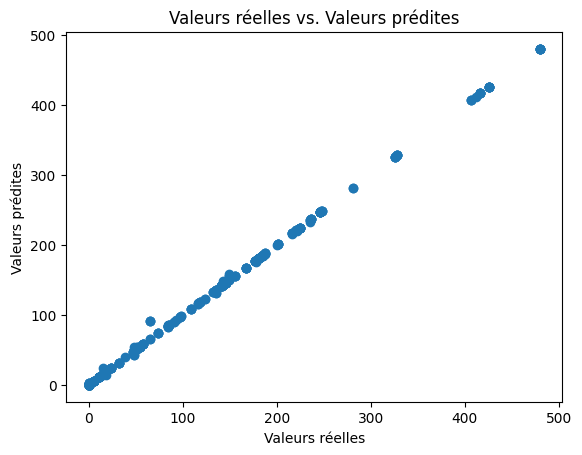

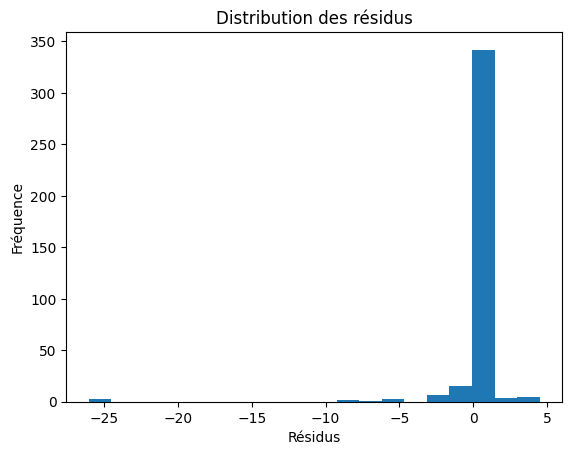

In [ ]:
# Évaluer le modèle

# Prédire sur l'ensemble de test
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erreur quadratique moyenne:", mse)
print("Erreur absolue moyenne:", mae)
print("Coefficient de détermination (R²):", r2)

# Plot des valeurs réelles par rapport aux valeurs prédites
plt.plot(y_test, y_pred, 'o')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs réelles vs. Valeurs prédites")
plt.show()

# Plot de la distribution des résidus
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Distribution des résidus")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Fonction pour le prétraitement des nouvelles données
def preprocess_new_data(new_data, scaler, selected_features):
    # Encoder les features catégorielles
    categorical_features = ['month', 'crop', 'soil', 'city']
    label_encoder = LabelEncoder()
    for feature in categorical_features:
        new_data[feature] = label_encoder.fit_transform(new_data[feature])

    # Sélectionner les features
    new_data_selected = new_data[selected_features]

    # Scale les features
    new_data_scaled = scaler.transform(new_data_selected)

    return new_data_scaled

# Donner de nouvelles données à prédire
new_data = pd.DataFrame({
    'month': ['March'],
    'Min Temp': [16.0800],
    'Max Temp': [32.010000],
    'Humidity': [35.030000],
    'Wind': [192.020000],
    'Sun': [8.100000],
    'Rad': [19.240000],
    'Rain': [5.040000],
    'crop': ['red sandy'],
    'soil': ['red loamy'],
    'city': ['kurnool'],
    'longitude': [75.78],
    'latitude': [26.9100],
    'altitude': [431.07]
})

# Appliquer le prétraitement sur les nouvelles données
preprocessed_new_data = preprocess_new_data(new_data.copy(), scaler, selected_features)

# Prédire sur les données prétraitées
new_predictions = best_model.predict(preprocessed_new_data)

# Afficher les prédictions
print("Prédiction pour les nouvelles données:", new_predictions)

Prédiction pour les nouvelles données: [72.24437639]
